Index(['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       150
        True       0.73      0.80      0.76        10

    accuracy                           0.97       160
   macro avg       0.86      0.89      0.87       160
weighted avg       0.97      0.97      0.97       160

[[147   3]
 [  2   8]]


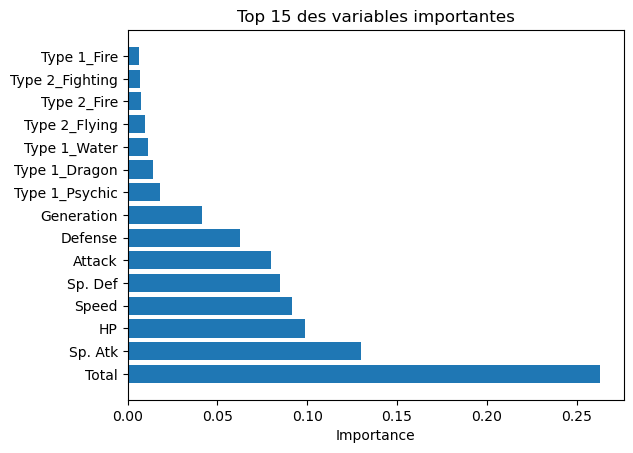

C:\Users\Amghid\AppData\Local\Temp\ipykernel_19092\1109609751.py:58: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([non_leg, leg],


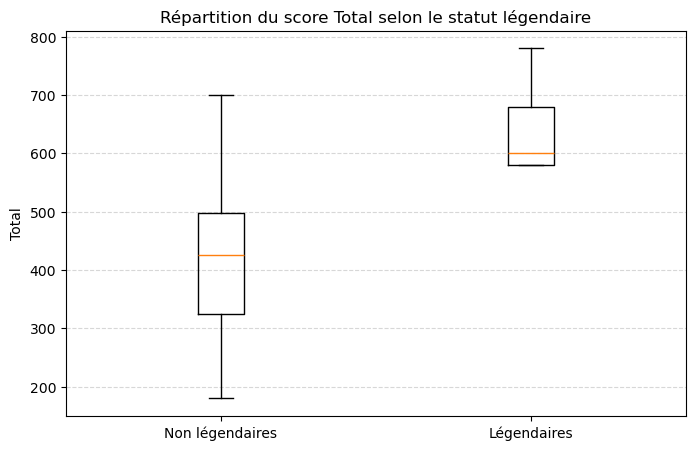

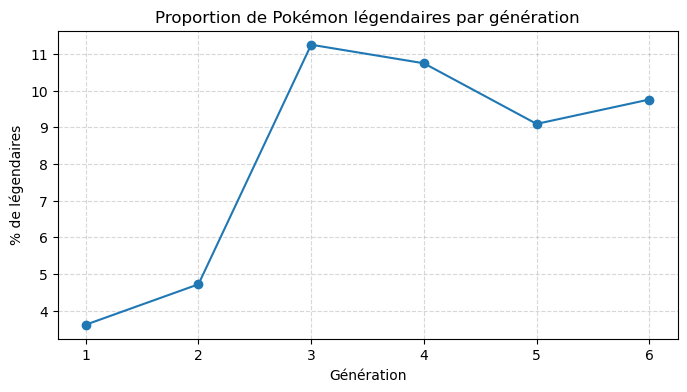

In [33]:
#Projet Pokémon Machine Learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Pokemon.csv")
df = df.drop(columns=['Name', '#'])
print(df.columns)

#Encodage des colonnes "Type"

df = pd.get_dummies(df, columns=['Type 1', 'Type 2'], drop_first=True)

#Séparation des varaibles 

X = df.drop('Legendary', axis=1)
y = df['Legendary']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrainement du modèle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Visualisations

import matplotlib.pyplot as plt
import numpy as np

#Variables les plus importantes

importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:15]

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Importance')
plt.title('Top 15 des variables importantes')
plt.show()

#Boxplot du score Total selon légendaire / pas légendaire

non_leg = df[df['Legendary'] == False]['Total']
leg = df[df['Legendary'] == True]['Total']

plt.figure(figsize=(8, 5))
plt.boxplot([non_leg, leg],
            labels=['Non légendaires', 'Légendaires'])
plt.ylabel("Total")
plt.title("Répartition du score Total selon le statut légendaire")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#Calcul du % de légendaires par génération
stats_gen = df.groupby('Generation')['Legendary'].mean() * 100

plt.figure(figsize=(8, 4))
plt.plot(stats_gen.index, stats_gen.values, marker='o')
plt.xlabel("Génération")
plt.ylabel("% de légendaires")
plt.title("Proportion de Pokémon légendaires par génération")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
